In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn

In [277]:
PATH = "./Lc/LAb2/mushrooms.csv"
data = pd.read_csv(PATH)
columns = list(data.columns)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [133]:
data_encoded = [np.reshape(data[i].astype("category").cat.codes,(8124,)) for i in data.columns]

In [134]:
data_encoded = pd.DataFrame(data_encoded,data.columns).T

# График корреляции признаков между собой

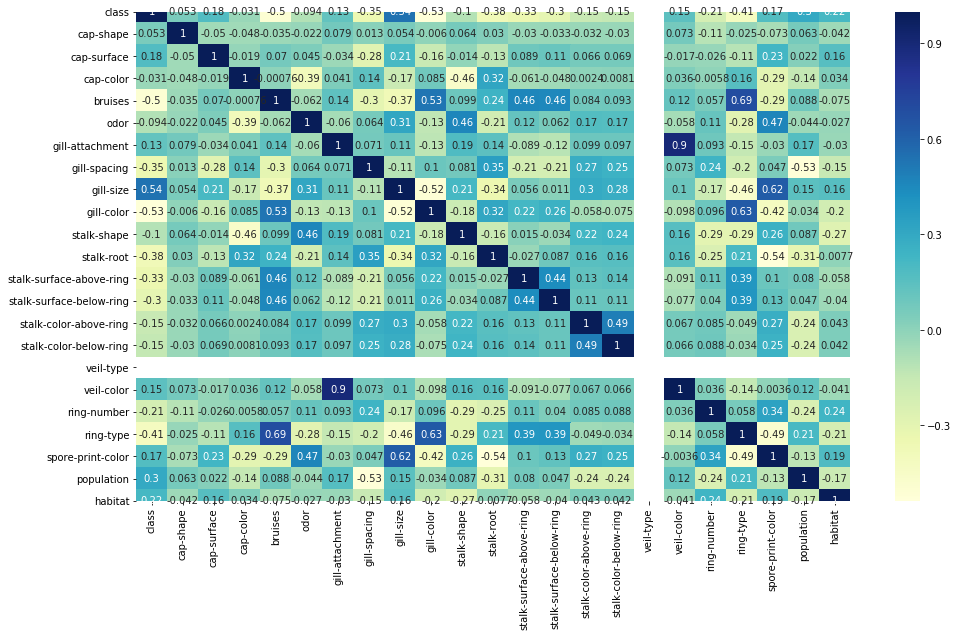

In [182]:
import seaborn as sns
plt.figure(figsize=(16,9))
sns.heatmap(data_encoded.corr(),cmap="YlGnBu",annot = True)
plt.show()

#  Корреляции признаков с целевой переменной

In [351]:
data_encoded.corr()['class'][1:]

cap-shape                   0.052951
cap-surface                 0.178446
cap-color                  -0.031384
bruises                    -0.501530
odor                       -0.093552
gill-attachment             0.129200
gill-spacing               -0.348387
gill-size                   0.540024
gill-color                 -0.530566
stalk-shape                -0.102019
stalk-root                 -0.379361
stalk-surface-above-ring   -0.334593
stalk-surface-below-ring   -0.298801
stalk-color-above-ring     -0.154003
stalk-color-below-ring     -0.146730
veil-type                        NaN
veil-color                  0.145142
ring-number                -0.214366
ring-type                  -0.411771
spore-print-color           0.171961
population                  0.298686
habitat                     0.217179
Name: class, dtype: float64

# Гистограммы распределения признаков

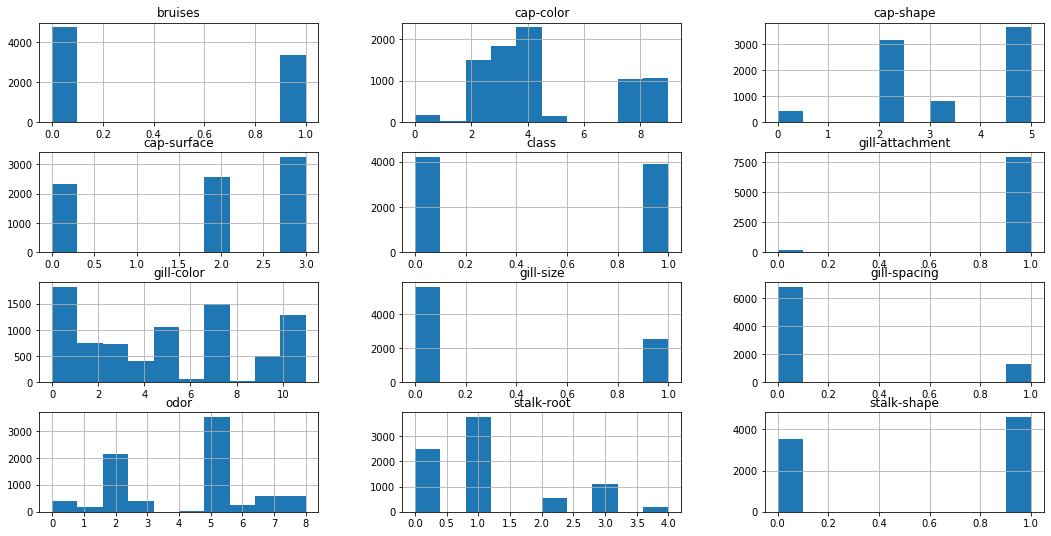

In [231]:
data_encoded[data_encoded.columns[:12]].hist(figsize=(18,9))
plt.show()

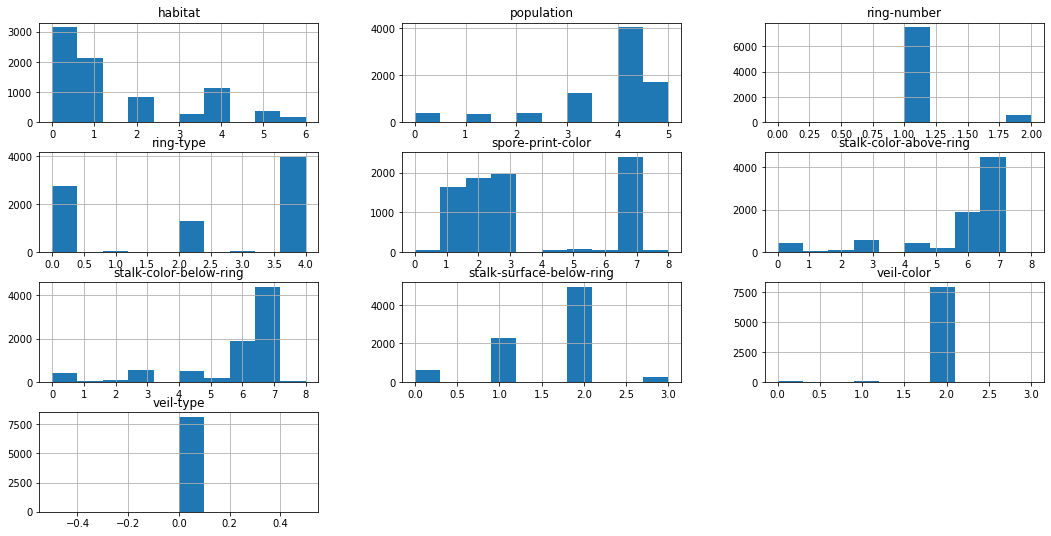

In [232]:
data_encoded[data_encoded.columns[13:23]].hist(figsize=(18,9))
plt.show()

# boxplots

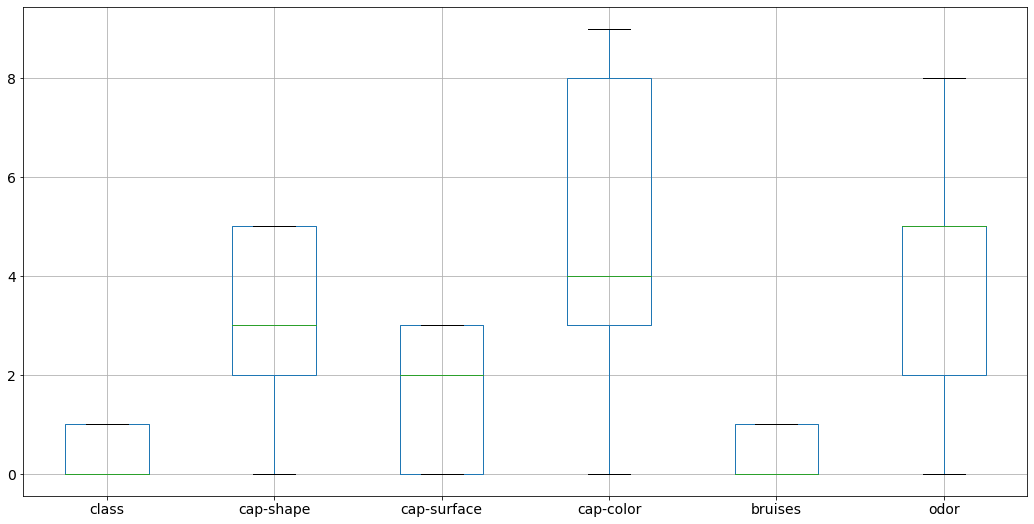

In [245]:
data_encoded.boxplot(list(data_encoded.columns[:6]),figsize=(18,9),fontsize = 14)
plt.show()

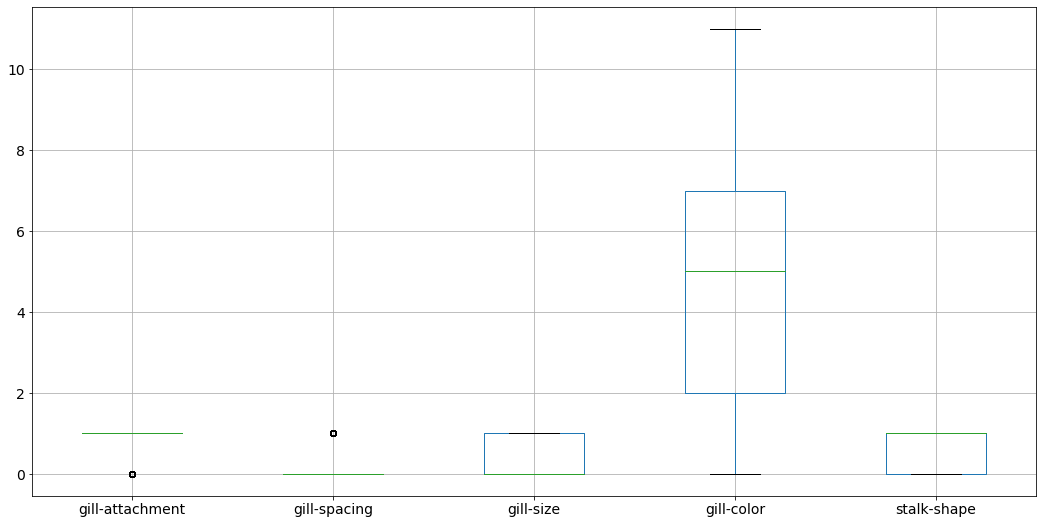

In [246]:
data_encoded.boxplot(list(data_encoded.columns[6:11]),figsize=(18,9),fontsize = 14)
plt.show()

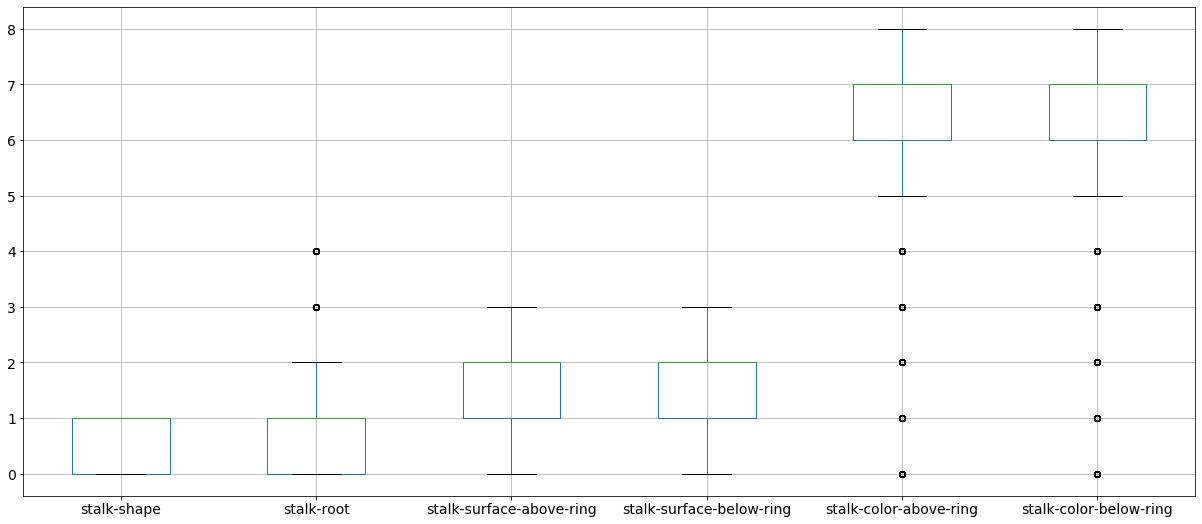

In [248]:
data_encoded.boxplot(list(data_encoded.columns[10:16]),figsize=(21,9),fontsize = 14)
plt.show()

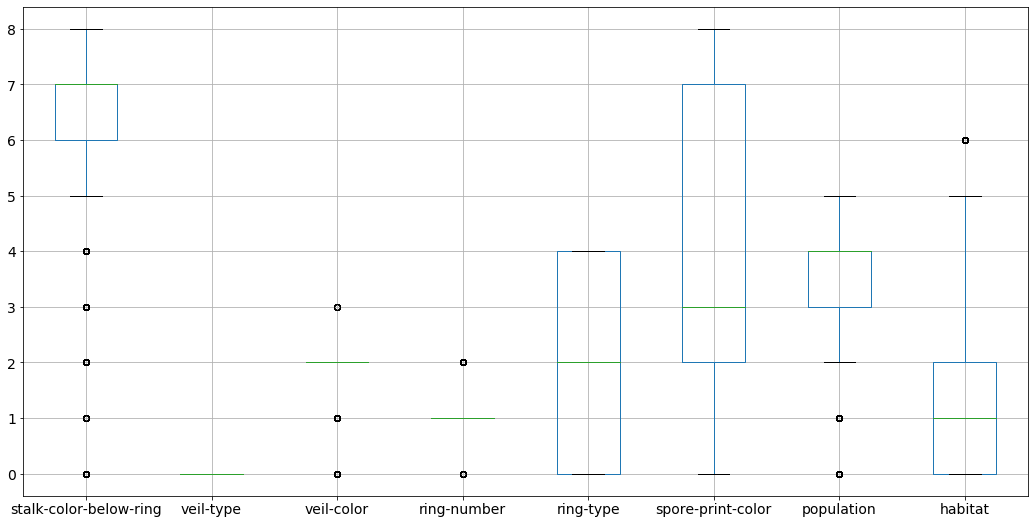

In [254]:
data_encoded.boxplot(list(data_encoded.columns[15:23]),figsize=(18,9),fontsize = 14)
plt.show()

# Диаграммы признаков относительно целевой переменной

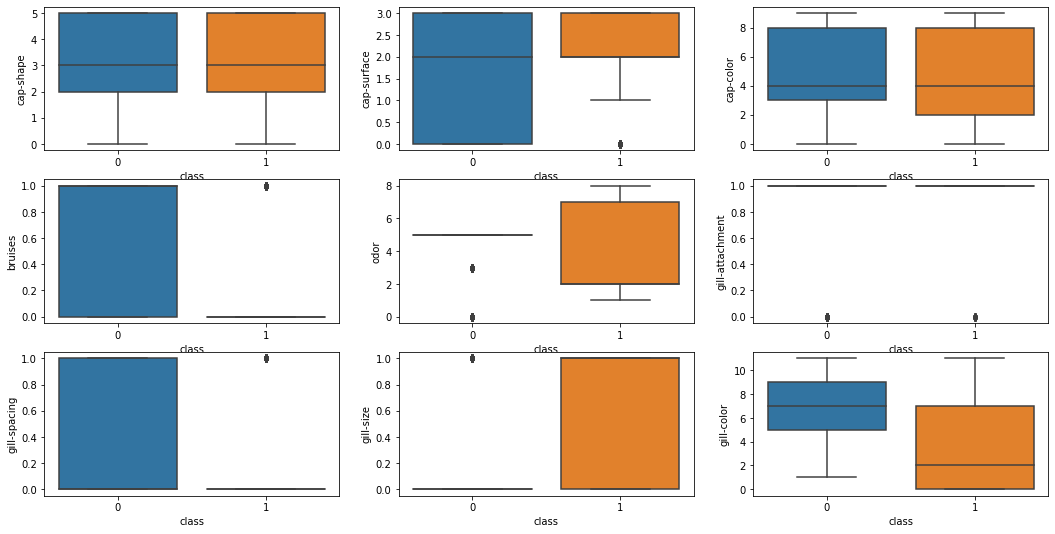

In [290]:
fig,axs = plt.subplots(3,3,figsize = (18,9))
sns.boxplot(data_encoded['class'],data_encoded[columns[1]],ax = axs[0,0])
sns.boxplot(data_encoded['class'],data_encoded[columns[2]],ax = axs[0,1])
sns.boxplot(data_encoded['class'],data_encoded[columns[3]],ax = axs[0,2])
sns.boxplot(data_encoded['class'],data_encoded[columns[4]],ax = axs[1,0])
sns.boxplot(data_encoded['class'],data_encoded[columns[5]],ax = axs[1,1])
sns.boxplot(data_encoded['class'],data_encoded[columns[6]],ax = axs[1,2])
sns.boxplot(data_encoded['class'],data_encoded[columns[7]],ax = axs[2,0])
sns.boxplot(data_encoded['class'],data_encoded[columns[8]],ax = axs[2,1])
sns.boxplot(data_encoded['class'],data_encoded[columns[9]],ax = axs[2,2])

In [315]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,train_test_split

In [296]:
data = data_encoded[columns[1:]]
target = data_encoded['class']

In [297]:
X_train,X_test,Y_train,Y_test = train_test_split(data,target,test_size = 0.3)

In [300]:
from sklearn.metrics import f1_score

In [337]:
modelKN = KNeighborsClassifier()
paramsKN = {"n_neighbors" : [5,10,15,20]}
MlKN = GridSearchCV(modelKN,paramsKN)
MlKN.fit(X_train,Y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [5, 10, 15, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [338]:
y_pred = MlKN.predict(X_test)
print("Score :",f1_score(Y_test,y_pred))
print(MlKN.best_estimator_)

Score : 0.9987206823027719
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [310]:
modelDT = DecisionTreeClassifier(max_depth=6)
modelDT.fit(X_train,Y_train)
y_predDT = modelDT.predict(X_test)
print("Score DecisionTree :",f1_score(Y_test,y_predDT))

Score DecisionTree : 0.9952809952809952


In [339]:
paramsSVM = {"C" : np.linspace(0.5,2,6),
            "kernel" : ("linear","rbf"),
            "gamma" : ("scale","auto")}

modelSVM = SVC()
mlSVM = GridSearchCV(modelSVM,paramsSVM)
mlSVM.fit(X_train,Y_train)
y_predSVM = mlSVM.predict(X_test)

In [340]:
print("Score SVM :", f1_score(Y_test,y_predSVM))
print(mlSVM.best_estimator_)

Score SVM : 1.0
SVC(C=1.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [342]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

params = {'n_estimators' : [30,50,80,100,150,200],
         'max_features' : (10,14,18,"auto")}

modelRF = RandomForestClassifier()
ML = GridSearchCV(modelRF,params)
ML.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [343]:
ML.predict(X_test)
y_predictedRF = ML.predict(X_test)
print("Score RandomForest :",f1_score(Y_test,y_predictedRF))
print(ML.best_params_)

Score RandomForest : 1.0
{'max_features': 10, 'n_estimators': 30}


In [329]:
paramsAdaBoos = {'n_estimators' : [30,50,80,100,150,200]}
modelAB = AdaBoostClassifier()
MlA = GridSearchCV(modelAB,paramsAdaBoos)
MlA.fit(X_train,Y_train)
y_predictedAB = MlA.predict(X_test)
print("Score ",f1_score(Y_test,y_predictedAB))

Score  1.0


In [332]:
MlA.best_params_

{'n_estimators': 30}

In [346]:
paramsGB = {"loss" : ("exponential","deviance"),
           "learning_rate" : [0.1,0.01,0.05],
           "n_estimators" : [30,50,80,100,150,200]}

modelGB = GradientBoostingClassifier()
MlGB = GridSearchCV(modelGB,paramsGB)
MlGB.fit(X_train,Y_train)
y_predictedGB = MlGB.predict(X_test)

In [344]:
print("Score GradientBoostingClassifier :",f1_score(Y_test,y_predictedGB))
print(MlGB.best_params_)

Score GradientBoostingClassifier : 1.0
{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}
